# Part2 NLP tasks
# FlavorGuru
## By Ratan Tejaswi Vadapalli

The title of the Project is FlavorGuru. The name of the team is Lone Wolf and Ratan Tejaswi Vadapalli is the sole-contributor to the project

## Preprocessing steps

The necessary libraries are first imported. Then the dataset epi_r.csv is loaded. Then, some basic exploratory data analysis is done on the dataset like finding the shape, info and null values etc. The plots for the ratings are plotted. The shape, info, and presence of null values in the dataset are examined. This step is crucial to understand the dataset's structure and to identify any data cleaning or transformation needs. Missing values in columns like 'rating' and 'calories' are filled with their mean. This step ensures that the dataset is complete for further analysis.Distribution of ratings is visualized using a seaborn countplot. This aids in understanding the ratings' spread and frequency.

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import nltk


#### Loading the dataset

In [2]:
dataset = pd.read_csv("epi_r.csv")

#### Basic Data Exploration

In [3]:
dataset.shape


(20052, 680)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [5]:
dataset.isnull()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
sum([True for idx,row in dataset.iterrows() if any(row.isnull())])


4188

In [7]:
dataset.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Check for missing values in each column

In [8]:
missing_values = dataset.isnull().sum()
print(missing_values)

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64


#### Visualize Rating Distribution

/Users/ratantejaswivadapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ratantejaswivadapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ratantejaswivadapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


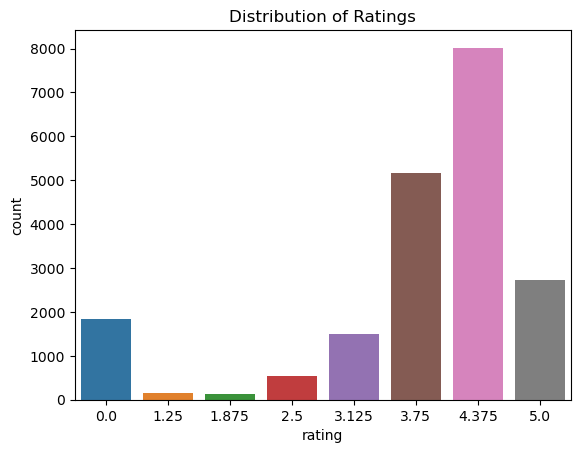

In [9]:
sns.countplot(data=dataset, x='rating')
plt.title('Distribution of Ratings')
plt.show()


##### Listing out all the column names

In [10]:
for i in dataset.columns:
    print(i)


title
rating
calories
protein
fat
sodium
#cakeweek
#wasteless
22-minute meals
3-ingredient recipes
30 days of groceries
advance prep required
alabama
alaska
alcoholic
almond
amaretto
anchovy
anise
anniversary
anthony bourdain
aperitif
appetizer
apple
apple juice
apricot
arizona
artichoke
arugula
asian pear
asparagus
aspen
atlanta
australia
avocado
back to school
backyard bbq
bacon
bake
banana
barley
basil
bass
bastille day
bean
beef
beef rib
beef shank
beef tenderloin
beer
beet
bell pepper
berry
beverly hills
birthday
biscuit
bitters
blackberry
blender
blue cheese
blueberry
boil
bok choy
bon appétit
bon app��tit
boston
bourbon
braise
bran
brandy
bread
breadcrumbs
breakfast
brie
brine
brisket
broccoli
broccoli rabe
broil
brooklyn
brown rice
brownie
brunch
brussel sprout
buffalo
buffet
bulgaria
bulgur
burrito
butter
buttermilk
butternut squash
butterscotch/caramel
cabbage
cake
california
calvados
cambridge
campari
camping
canada
candy
candy thermometer
cantaloupe
capers
caraway
cardamom


The non-ingredient columns is manually created after going through the columns

In [11]:
non_ingredient_columns = [
    'title', 'rating', 'calories', 'protein', 'fat', 'sodium',
    'vegan', 'vegetarian', 'wheat/gluten-free', 'low fat', 'low sugar', 'low sodium',
    'dairy free', 'kid-friendly', 'paleo', 'kosher', 'kosher for passover',
    'peanut free', 'tree nut free', 'soy free', 'no meat, no problem', 'no sugar added', 
    'no-cook', 'grill', 'grill/barbecue', 'boil', 'fry', 'bake', 'roast', 'steam', 
    'sauté', 'stir-fry', 'deep-fry', 'broil', 'marinate', 'simmer', 'poach', 'braise',
    'quick & easy', 'healthy', 'high fiber', 'raw',
    'dinner', 'breakfast', 'lunch', 'brunch', 'appetizer', 'dessert', 'snack', 'drink',
    'valentine\'s day', 'thanksgiving', 'christmas', 'easter', 'halloween', 'super bowl', 
    'fourth of july', 'new year\'s eve', 'new year\'s day', 'hanukkah', 'birthday',
    'wedding', 'anniversary', 'party', 'picnic', 'summer', 'winter', 'fall', 'spring',
    'cocktail party', 'backyard bbq', 'back to school', 'snack week', 'leftovers',
    'bon appétit', 'gourmet', 'house & garden', 'weelicious', 'epi loves the microwave',
    'blender', 'food processor', 'microwave', 'smoker', 'pressure cooker', 'slow cooker', 
    'mixer', 'juicer', 'grill', 'mortar and pestle', 'double boiler', 'coffee grinder',
    'pasta maker', 'candy thermometer',
    'alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut', 
    'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 
    'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 
    'minnesota', 'mississippi', 'missouri', 'nebraska', 'new hampshire', 
    'new jersey', 'new mexico', 'new york', 'north carolina', 'ohio', 'oklahoma', 
    'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'tennessee', 
    'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
    'washington, d.c.', 'los angeles', 'san francisco', 'chicago', 'boston', 'atlanta', 
    'dallas', 'miami', 'seattle', 'houston', 'paris', 'london', 
    'israel', 'italy', 'jamaica', 'japan', 'mexico', 'dominican republic', 'france', 
    'germany', 'england', 'spain', 'ireland', 'australia', 'canada', 'egypt', 'beverly hills',
    'brooklyn', 'bulgaria','cambridge','columbus', 'costa mesa', 'florida', 'guam','haiti', 'healdsburg',
    'kansas city', 'lancaster', 'las vegas', 'long beach', 'louisville', 'minneapolis', 'new orleans',
    'pasadena', 'peru', 'philippines', 'pittsburgh','portland', 'providence', 'santa monica', 'st. louis',
    'switzerland', 'westwood', 'windsor',
    'alcoholic', 'non-alcoholic', 'vegetable', 'fruit', 'meat', 'poultry', 'seafood',
    'dairy', 'condiment', 'cocktail', 'sandwich', 'candy', 'edible gift', 'cake', 'pescatarian', 'side', 
    'sugar conscious', 'kidney friendly', 'low cal', 'soup/stew', 'leafy green', 'condiment/spread',
    '#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes', 
    '30 days of groceries', 'advance prep required', 'anthony bourdain', 'bastille day',
    'bon app��tit',  'camping', 'chill', 'christmas eve', 'cook like a diner', 'cookbook critic',
    'diwali','dorie greenspan', 'emeril lagasse', 'engagement party', 'entertaining', 'epi + ushg',
    'family reunion', "father's day", 'flaming hot summer', 'frankenrecipe', 'freeze/chill', 'freezer food', 
    'friendsgiving', 'frozen dessert', 'fruit juice', 'game','graduation', 'grand marnier', 'harpercollins',
    'hollywood',"hors d'oeuvre", 'hot drink', 'house cocktail', 'ice cream', 'ice cream machine', 
    'iced coffee', 'iced tea','kentucky derby','kitchen olympics','kwanzaa', 'labor day', 
    'low carb', 'low cholesterol', 'low/no sugar', 'lunar new year', 'mardi gras',"mother's day", 
    'nancy silverton',  'oktoberfest', 'one-pot meal', 'oscars','pacific palisades', 'pan-fry',
    'passover', 'persian new year', 'pizza', 'poker/game night', 'quick and healthy', 'ramadan',
    'sandwich theory', 'sangria', "st. patrick's day", 'tailgating', 'tested & improved', 'triple sec', 
    'tropical fruit', 'yonkers', 'cookbooks'
]



Then, the ingredient columns list is created from the rest of the columns. Sum each ingredient column is computed.

In [12]:
ingredient_columns = [col for col in dataset.columns if col not in non_ingredient_columns]
ingredient_sums = dataset[ingredient_columns].sum().sort_values(ascending=False)

A new column combined_text is created by concatenating the 'title' and other non-ingredient columns. This combined text field is used for text-based feature extraction.

In [13]:
dataset['combined_text'] = dataset['title'] + " " + dataset[non_ingredient_columns].apply(lambda row: ' '.join(row.index[row == 1]), axis=1)


## Feature Extraction 

The TfidfVectorizer from Scikit-learn is used to convert the combined_text into a matrix of TF-IDF features. This transformation is essential for understanding the importance of words (in this case, ingredients and tags which are the non-ingredients) in the dataset. A cosine similarity matrix is computed from the TF-IDF vectors. This matrix will be used to find similarities between different recipes based on their textual content. The Apriori algorithm is applied to the ingredient data transformed via TransactionEncoder. This step is crucial for finding frequent itemsets and generating association rules, which are key in recommending recipes based on ingredient combinations.

In [14]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(dataset['combined_text'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

The below recommend_recipes method generates the recipe recommendations based on the given recipe using cosine similarity scores. The method currently generates top 10 recipes similar to the one given.

In [15]:
def recommend_recipes(title, dataset, cosine_sim):
    if title not in dataset['title'].values:
        print(f"Recipe '{title}' not found.")
        return None

    idx = dataset.index[dataset['title'] == title].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    recipe_indices = [i[0] for i in sim_scores]

    return dataset['title'].iloc[recipe_indices]

In [16]:
recipe_title = "Tuscan Panzanella " 
recommended_recipes = recommend_recipes(recipe_title, dataset, cosine_sim)
print(recommended_recipes)

15689                  Salmon Panzanella With Green Beans 
15030                               Corn Bread Panzanella 
748                         Tuscan Tuna Salad with Fennel 
16741                  Tuscan Vegetable Soup (acquacotta) 
16662                            Couscous Vegetable Salad 
9408     Panzanella Tomato Toast with Crispy Capers and...
11842                             Fresh Vegetable Pickles 
13674                             Fresh Vegetable Pickles 
18226                                    White Bean Salad 
18308                               Baked Corn with Thyme 
Name: title, dtype: object


The Apriori algorithm is applied to the ingredient data transformed via TransactionEncoder. This step is crucial for finding frequent itemsets and generating association rules, which are key in recommending recipes based on ingredient combinations.

In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

The dataset is converted into transaction formt for the Apiori algorithm

In [18]:
transactions = dataset[ingredient_columns].apply(lambda x: list(x.index[x == 1]), axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

The Apriori Algorithm is applied

In [19]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

The function association_rule_recommendations is designed to provide recommendations based on association rules derived from a list of ingredients.

In [20]:
def association_rule_recommendations(ingredient_list, rules):
    recommendations = set()
    for ingredient in ingredient_list:
        consequents = rules[rules['antecedents'] == {ingredient}]['consequents']
        for items in consequents:
            recommendations.update(items)
    return [item for item in recommendations if item not in ingredient_list]

The recipe_recommendations_based_on_ingredients takes the selected ingredients list as an input with the rules and the dataset, and then generated the top 10 recipes recommended with those ingredients.

In [21]:
def recipe_recommendations_based_on_ingredients(selected_ingredients, rules, dataset):
    recommended_ingredients = association_rule_recommendations(selected_ingredients, rules)
    scores = []
    for index, row in dataset.iterrows():
        score = sum([row[ingredient] for ingredient in recommended_ingredients if ingredient in row])
        scores.append((index, score))
    scores.sort(key=lambda x: x[1], reverse=True)
    top_recipe_indices = [index for index, score in scores[:10]]
    return dataset['title'].iloc[top_recipe_indices]

In [32]:
def recipe_recommendations_based_on_tags(matching_tags, rules, dataset):
    recommended_tags = association_rule_recommendations(matching_tags, rules)
    scores = []
    for index, row in dataset.iterrows():
        score = sum([row[tag] for tag in recommended_tags if tag in row])
        scores.append((index, score))
    scores.sort(key=lambda x: x[1], reverse=True)
    top_recipe_indices = [index for index, score in scores[:10]]
    return dataset['title'].iloc[top_recipe_indices]

The modified_ingredient_based_recommendations method is a method which makes used of the above method, but is a custom method which can take user input where the user can choose from a list of ingredients, the number of which the user can choose, and then can input three ingredients from that list and then, the method generates the recommendations based on that.

In [22]:
def modified_ingredient_based_recommendations(dataset, ingredient_columns, rules):
    try:
        num_ingredients = int(input("How many ingredients would you like to choose from? "))
        top_ingredients = dataset[ingredient_columns].sum().sort_values(ascending=False).head(num_ingredients)
        print("Top ingredients to choose from:")
        for i, ingredient in enumerate(top_ingredients.index, 1):
            print(f"{i}. {ingredient}")
        selected_ingredients = []
        for _ in range(3):
            ingredient_input = input("Enter ingredient name: ").strip()
            if ingredient_input not in top_ingredients.index:
                raise ValueError(f"'{ingredient_input}' is not in the top ingredients list.")
            selected_ingredients.append(ingredient_input)
        recommendations = recipe_recommendations_based_on_ingredients(selected_ingredients, rules, dataset)
        print("Top 10 recipe recommendations:")
        for title in recommendations:
            print(title)
    except ValueError as ve:
        print(f"Invalid input: {ve}")

The next set of methods are a different kind where they generate a recommendation based on a recipe. This extracts all the ingredients from that recipe and uses teh above method to generate recommendations by passing those ingredients as the input.

In [23]:
def extract_ingredients_from_recipe(recipe_title, dataset, ingredient_columns):
    if recipe_title not in dataset['title'].values:
        print(f"The recipe '{recipe_title}' does not exist in the dataset.")
        return None
    recipe_row = dataset[dataset['title'] == recipe_title].iloc[0]
    return [col for col in ingredient_columns if recipe_row[col] == 1]

In [24]:
def get_recommendations_based_on_recipe(recipe_title, rules, dataset, ingredient_columns):
    ingredients = extract_ingredients_from_recipe(recipe_title, dataset, ingredient_columns)
    if ingredients is None:
        return None
    return recipe_recommendations_based_on_ingredients(ingredients, rules, dataset)

## Main Functionality

The function process_user_query takes a user's food preferences as input, tokenizes it, and matches it with ingredients and tags. It then provides recommendations based on these matches using both ingredient-based and tag-based recommendations. The system interacts with the user, asking for their food preferences and then using the processed query to provide recipe recommendations. This interaction is looped until the user chooses to exit. The function recommend_based_on_preference allows users to get recipe recommendations based on their preference for 'calories' or 'ratings' within a specified range.



In [25]:
def user_recipe_based_recommendation(dataset, ingredient_columns):
    recipe_title = input("Please enter the name of the recipe: ")
    recipe_title += " "  # Adding space to match the dataset format
    recommendations = get_recommendations_based_on_recipe(recipe_title, rules, dataset, ingredient_columns)
    
    if recommendations is not None:
        print("Top 10 recipe recommendations:")
        print(recommendations.head(10))
    else:
        print("Recipe not found or no recommendations available.")


This method is to ask for user input and prompt the user to choose if they want recommendation based on a list of ingredients or based on a recipe.

In [26]:
user_choice = input("Choose an option: 1 for Ingredient-based, 2 for Recipe-based: ").strip()
if user_choice == "1":
    modified_ingredient_based_recommendations(dataset, ingredient_columns, rules)
elif user_choice == "2":
    user_recipe_based_recommendation(dataset, ingredient_columns)
else:
    print("Invalid option selected.")

Top ingredients to choose from:
1. onion
2. tomato
3. milk/cream
4. egg
5. herb
6. garlic
7. salad
8. cheese
9. chicken
10. ginger
11. potato
12. lemon
13. sauce
14. pasta
15. fish
Top 10 recipe recommendations:
Spicy Black Beans and Rice 
Spicy Tomato Sauce 
Homemade Tomato Ketchup 
Southwest Veggie Nachos 
Cherry Cola Barbecue Sauce 
Beef Stroganoff with Tomatoes 
Baked Trout with Shiitake Mushrooms, Tomatoes, and Ginger 
Pot Roast with Orange and Dates 
Tía Rosa and Ruth Eichner's Sweet-and-Sour Carrots 
Fresh Tomato Salsa 


The next part is a different approach where the user gives the input and the input is tokenized using word_tokenize and then each token is compared against the list of ingredients and non-ingredients. Then, the recommendations are generated based on this.

In [27]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ratantejaswivadapalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The process_user_query tokenizes the user input query, finds the matching ingredients and tags, then generates recommendations based on matching ingredients and then based on matching tags. Then they are both combined and then the recommendation are generated.

In [46]:
def process_user_query(user_query, dataset, rules, ingredient_columns, non_ingredient_columns):
    tokens = word_tokenize(user_query.lower())
    matching_ingredients = [ingredient for ingredient in ingredient_columns if any(token in ingredient for token in tokens)]
    matching_tags = [tag for tag in non_ingredient_columns if any(token in tag for token in tokens)]
    if matching_ingredients:
        ingredient_recommendations = recipe_recommendations_based_on_ingredients(matching_ingredients, rules, dataset)
    else:
        ingredient_recommendations = []
    if matching_tags:
        tag_recommendations = recipe_recommendations_based_on_tags(matching_tags, rules, dataset)
    else:
        tag_recommendations = []
   
    combined_recommendations = list(set(ingredient_recommendations + tag_recommendations))

    return combined_recommendations[:10] if combined_recommendations else "No matching recipes found based on your preferences."


In [48]:
while True:
    user_preference = input("Enter your food preferences or 'exit' to stop: ").strip()
    if user_preference.lower() == 'exit':
        break
    recommendations = process_user_query(user_preference, dataset, rules, ingredient_columns, non_ingredient_columns)

    if isinstance(recommendations, str):
        print(recommendations)
    else:
        print("Recommended recipes:")
        for title in recommendations:
            print(title)

    print("\n")
#Note: make sure to include atleast one ingredient and non-ingredient else, it will throw an error

Recommended recipes:
nan
Boudin Blanc Terrine with Red Onion Confit Boudin Blanc Terrine with Red Onion Confit 


Recommended recipes:
Potato and Fennel Soup Hodge Potato and Fennel Soup Hodge 
Spicy-Sweet Kumquats Spicy-Sweet Kumquats 
Mahi-Mahi in Tomato Olive Sauce Mahi-Mahi in Tomato Olive Sauce 
Ham Persillade with Mustard Potato Salad and Mashed Peas Ham Persillade with Mustard Potato Salad and Mashed Peas 
The Best Blts The Best Blts 
Boudin Blanc Terrine with Red Onion Confit Boudin Blanc Terrine with Red Onion Confit 
Korean Marinated Beef Korean Marinated Beef 
Ham and Spring Vegetable Salad with Shallot Vinaigrette Ham and Spring Vegetable Salad with Shallot Vinaigrette 
Spinach Noodle Casserole Spinach Noodle Casserole 
Lentil, Apple, and Turkey Wrap Lentil, Apple, and Turkey Wrap 




The next method is kind of a recommenation where the user has no idea and can choose from a calorie based or a rating based recommendation. The user can input a range of calories or range of ratings and gets the recommendations based on that.

The ratings and calories columns are double checked for any missing values and filled with the mean.

In [49]:
for col in ['rating', 'calories']:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

The recommend_based_on_preference takes the user input, then filters the dataset based on what the user asked. Then the recipes are displayed according to what the user wants.

In [52]:
def recommend_based_on_preference(dataset):
    preference = input("Do you want recommendations based on 'calories' or 'rating'? ").strip().lower()
    if preference not in ['calories', 'rating']:
        print("Invalid preference. Please choose 'calories' or 'rating'.")
        return

    try:
        lower_bound = float(input(f"Enter lower bound for {preference}: "))
        upper_bound = float(input(f"Enter upper bound for {preference}: "))
        num_recipes = int(input("How many recipes do you want to see? "))
        filtered_recipes = dataset[(dataset[preference] >= lower_bound) & (dataset[preference] <= upper_bound)]
        print(f"\nTop {num_recipes} recipes based on your {preference} preference:")
        for i, row in filtered_recipes.nlargest(num_recipes, preference).iterrows():
            print(f"{i+1}. {row['title']} - {preference.capitalize()}: {row[preference]}")
    except ValueError:
        print("Invalid input. Please enter a valid number.")
        return

recommend_based_on_preference(dataset)



Top 7 recipes based on your rating preference:
3. Potato and Fennel Soup Hodge  - Rating: 3.75
8. Spicy-Sweet Kumquats  - Rating: 3.75
10. Ham Persillade with Mustard Potato Salad and Mashed Peas  - Rating: 3.75
11. Yams Braised with Cream, Rosemary and Nutmeg  - Rating: 3.75
22. "Fried" Chicken  - Rating: 3.75
23. Fish Fillets in Parchment with Asparagus and Orange  - Rating: 3.75
24. Pancetta and Taleggio Lasagna with Treviso  - Rating: 3.75


The next update that I would try for this is to take the calorie and rating input as a query and then process that query to see if they can be taken as the above method works and then try to get the recommendations, before adding the UI

## Personal Contribution Statement

The whole project is my work since this is an individual project. In this project, I have performed several key tasks to develop a recipe recommendation system using Natural Language Processing (NLP) and machine learning techniques.

Preprocessing Steps:
I started with loading the dataset into a Pandas DataFrame. This dataset contains an array of recipes, complete with their ingredients, nutritional content, and additional tags or categories. The initial phase involved basic data exploration, where I analyzed the dataset's shape, information, and null values, providing a fundamental understanding of the dataset structure and pinpointing any data cleaning or transformation requirements. A crucial step was the handling of missing values, particularly in columns like 'rating' and 'calories', where missing entries were filled with their mean values. This ensured the dataset's completeness for further analysis. To gain insights into the distribution of ratings, I utilized data visualization techniques, specifically seaborn countplots. Furthermore, I created a combined text field by merging the 'title' with other non-ingredient columns. This field serves as the basis for text-based feature extraction.

Feature Extraction:
For feature extraction, I employed TF-IDF Vectorization to transform the combined text into a matrix of TF-IDF features. This process is critical for quantifying the significance of words in the dataset. Based on these features, I computed a Cosine Similarity Matrix, a vital tool for identifying similarities between recipes based on their textual content. Additionally, I applied the Apriori algorithm for Association Rules to the ingredient data, converted via the TransactionEncoder. This approach was key to identifying frequent itemsets and generating association rules, pivotal in recommending recipes based on ingredient combinations.

Main Functionality:
I developed a function, process_user_query, that takes user food preferences, tokenizes them, and matches them with ingredients and tags, providing recipe recommendations based on these matches. This included both ingredient-based and tag-based recommendations. To enhance user interaction, I implemented a user-interactive recipe recommendation system. It continuously interacts with users, asking for their food preferences and providing recommendations based on processed queries, until they choose to exit. Lastly, the preference-based recommendation feature allows users to receive recipe suggestions based on their specific 'calories' or 'ratings' preferences within a desired range. This feature adds a personalized touch to the recommendation system, catering to individual dietary needs or interests.